**First: Exploration of the feature text**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import seaborn as sns
from IPython.display import display
pd.options.mode.chained_assignment = None

#Getting data
tweets = pd.read_csv('../input/demonetization-tweets.csv', encoding = "ISO-8859-1")
display(tweets.head(3))

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,801495656976318464,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,801495654778413057,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,801495544266821632,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [2]:
#tweets['text'].str.split(': ',expand=True)[0]
#tweets['text'].str.contains('@', na=False).astype(int)
#tweets_bis=tweets['text'].str.replace('RT @', '@', case=True)
#print(tweets_bis)
#tweets_bis.str.startswith('@', na=False).astype(int)

#del RT @blablabla:

tweets['text_new'] = ''

import re

for i in range(len(tweets['text'])):
    m = re.search('(?<=:)(.*)', tweets['text'][i])
    try:
        tweets['text_new'][i]=m.group(0)
    except AttributeError:
        tweets['text_new'][i]=tweets['text'][i]
        
print(tweets['text_new'].head())        

0     Critical question: Was PayTM informed about #...
1     Did you vote on #Demonetization on Modi surve...
2     Former FinSec, RBI Dy Governor, CBDT Chair + ...
3     Gurugram (Haryana): Post office employees pro...
4     Reddy Wedding! @mail_today cartoon #demonetiz...
Name: text_new, dtype: object


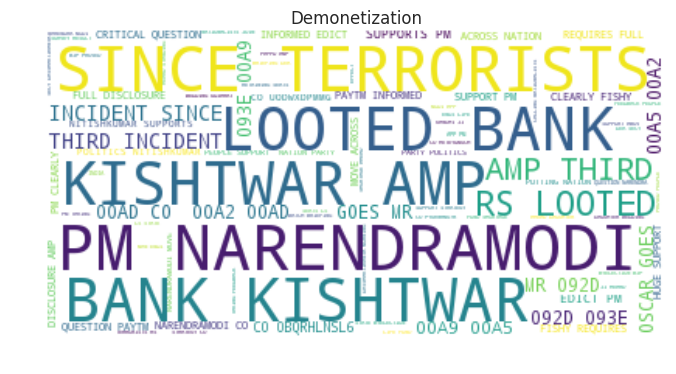

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    #Narendra Modi is the Prime minister of India
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Demonetization")

wordcloud_by_province(tweets)  

**"Since terrorists"? "Narenda Modi"? Ok We must continue to investigate. I think that we must investigate separetly the tweets with the words "terrorists" and "narendramodi"** 

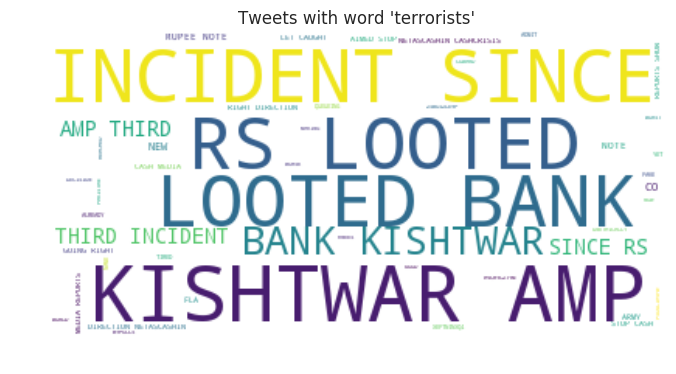

In [4]:
def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweets['text'].str.contains("terrorists").astype(int))
    b = list(a[a['text']==1].index.values)
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("terrorists")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets.ix[b,:]['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'terrorists'")

wordcloud_by_province(tweets)  

**It is possible that The Demonitazation have a link with Kishtwar and the terrorist**

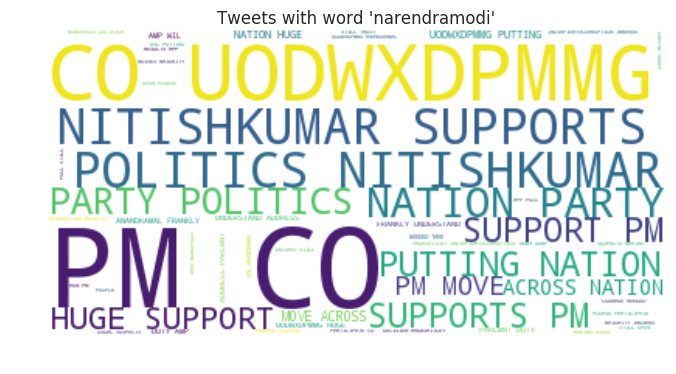

In [5]:
def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweets['text'].str.contains("narendramodi").astype(int))
    b = list(a[a['text']==1].index.values)
    stopwords = set(STOPWORDS)
    stopwords.add("narendramodi")
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets.ix[b,:]['text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'narendramodi'")

wordcloud_by_province(tweets)  

**I think that "PM" represents the word "Prime Minister".  The different tweets with narendramodi are supports ?**

In [6]:
print(tweets['retweetCount'].describe())

count    8000.000000
mean      167.263250
std       272.506961
min         0.000000
25%         4.000000
50%        41.000000
75%       221.000000
max      1944.000000
Name: retweetCount, dtype: float64


In [7]:
tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute

In [8]:
tweets_hour = tweets.groupby(['hour'])['retweetCount'].sum()
tweets_minute = tweets.groupby(['minute'])['retweetCount'].sum()
tweets['text_len'] = tweets['text'].str.len()
tweets_avgtxt_hour = tweets.groupby(['hour'])['text_len'].mean()

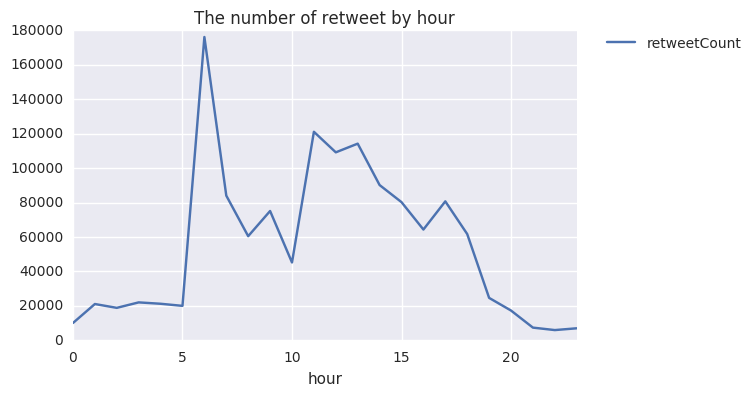

In [9]:
import seaborn as sns
tweets_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by hour')

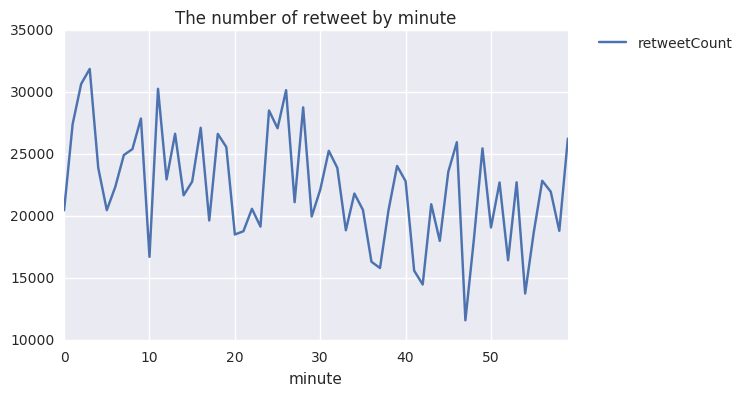

In [10]:
tweets_minute.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by minute')

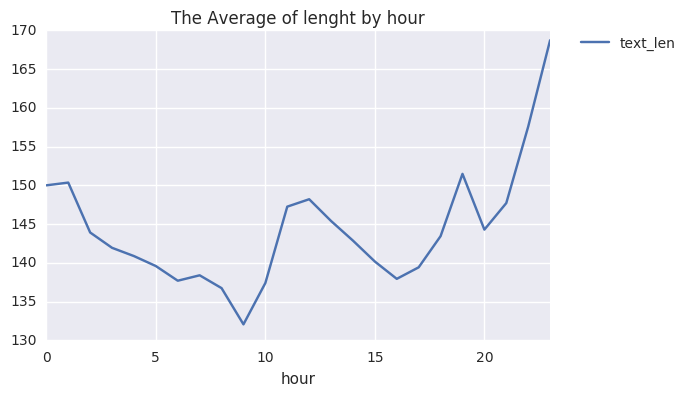

In [11]:
tweets_avgtxt_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average of lenght by hour')

In [12]:
tweets['statusSource_new'] = ''

for i in range(len(tweets['statusSource'])):
    m = re.search('(?<=>)(.*)', tweets['statusSource'][i])
    try:
        tweets['statusSource_new'][i]=m.group(0)
    except AttributeError:
        tweets['statusSource_new'][i]=tweets['statusSource'][i]
        
#print(tweets['statusSource_new'].head())   

tweets['statusSource_new'] = tweets['statusSource_new'].str.replace('</a>', ' ', case=False)

In [13]:
tweets['statusSource_new'] = tweets['statusSource_new'].str.replace('</a>', ' ', case=False)
#print(tweets[['statusSource_new','retweetCount']])

tweets_by_type= tweets.groupby(['statusSource_new'])['retweetCount'].sum()
#print(tweets_by_type)

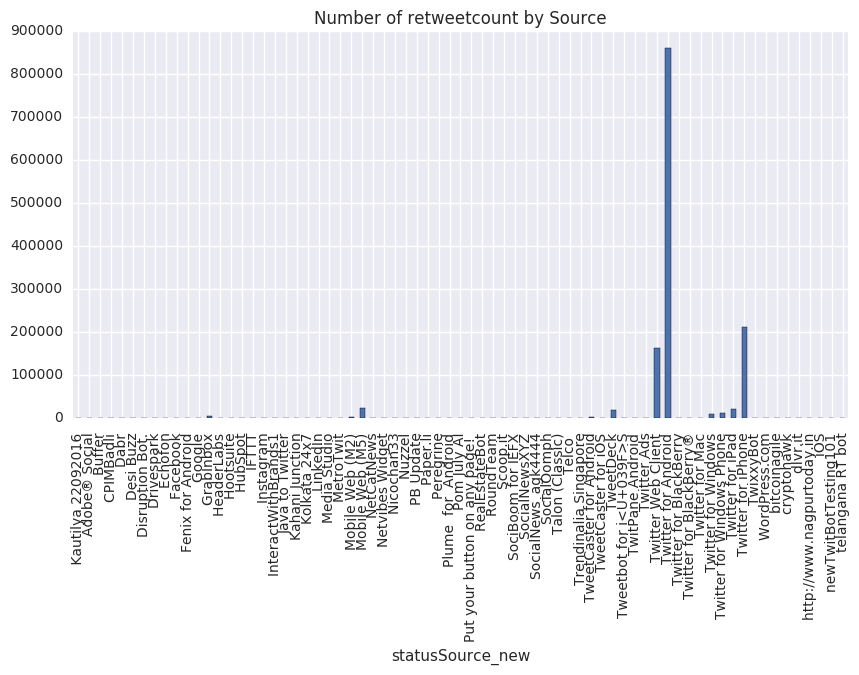

In [14]:
tweets_by_type.transpose().plot(kind='bar',figsize=(10, 5))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Number of retweetcount by Source')

**Top 3 of Source: 1 - Twitter For Android 2 - Twitter Web Client and finally 3 - Twitter for Iphone !**

In [15]:
tweets['statusSource_new2'] = ''

for i in range(len(tweets['statusSource_new'])):
    if tweets['statusSource_new'][i] not in ['Twitter for Android ','Twitter Web Client ','Twitter for iPhone ']:
        tweets['statusSource_new2'][i] = 'Others'
    else:
        tweets['statusSource_new2'][i] = tweets['statusSource_new'][i] 
#print(tweets['statusSource_new2'])       

tweets_by_type2 = tweets.groupby(['statusSource_new2'])['retweetCount'].sum()

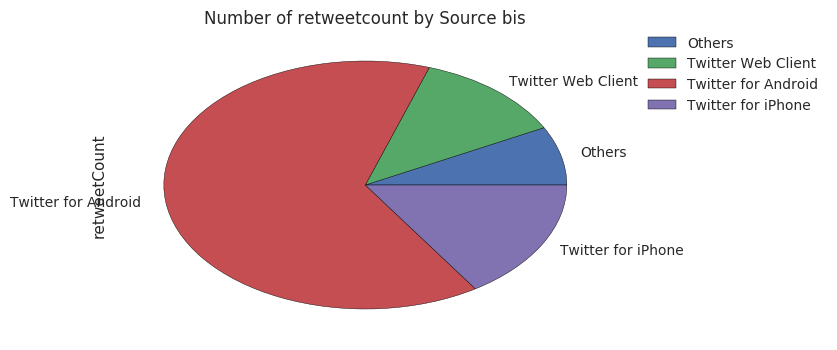

In [16]:
tweets_by_type2.transpose().plot(kind='pie',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Number of retweetcount by Source bis')